# Análise de Drug Discovery

Dados fornecidos pela alura, baseados nas bases da seguinte competição do Kaggle: kaggle.com/c/lish-moa/overview

Temos duas bases de dados,:

- Com as *features* dos tratamentos, como variáveis dos tratamentos (dose, tempo de exposição, composto utilizado) e consequências a nível de expressão gênica (colunas 'g-') e de viabilidade celular (colunas 'c-')
- Com os resultados em mecanismos de ação (MoA, na sigla em inglês)
- mskdlmasd

In [ ]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [ ]:
# importando bases

exp = pd.read_csv('https://github.com/SrBisco/imersao-dados-desafio-final/blob/dev/Dados/dados_experimentos.zip?raw=true', compression='zip')
res = pd.read_csv('https://github.com/SrBisco/imersao-dados-desafio-final/blob/dev/Dados/dados_resultados.csv?raw=true')

In [ ]:
exp.head()

,id,tratamento,tempo,dose,droga,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,g-26,g-27,g-28,g-29,g-30,g-31,g-32,g-33,g-34,...,c-60,c-61,c-62,c-63,c-64,c-65,c-66,c-67,c-68,c-69,c-70,c-71,c-72,c-73,c-74,c-75,c-76,c-77,c-78,c-79,c-80,c-81,c-82,c-83,c-84,c-85,c-86,c-87,c-88,c-89,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,-0.0326,0.5548,-0.0921,1.1830,0.1530,0.5574,-0.4015,0.1789,-0.6528,-0.7969,0.6342,0.1778,-0.3694,-0.5688,-1.1360,-1.1880,0.6940,0.4393,0.2664,0.1907,0.1628,-0.2853,0.5819,0.2934,-0.5584,-0.0916,-0.3010,-0.1537,...,0.4805,0.4965,0.3680,0.8427,0.1042,0.1403,0.1758,1.2570,-0.5979,1.2250,-0.0553,0.7351,0.5810,0.9590,0.2427,0.0495,0.4141,0.8432,0.6162,-0.7318,1.2120,0.6362,-0.4427,0.1288,1.4840,0.1799,0.5367,-0.1111,-1.0120,0.6685,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,0.3372,-0.4047,0.8507,-1.1520,-0.4201,-0.0958,0.4590,0.0803,0.2250,0.5293,0.2839,-0.3494,0.2883,0.9449,-0.1646,-0.2657,-0.3372,0.3135,-0.4316,0.4773,0.2075,-0.4216,-0.1161,-0.0499,-0.2627,0.9959,-0.2483,0.2655,...,0.4083,0.0319,0.3905,0.7099,0.2912,0.4151,-0.2840,-0.3104,-0.6373,0.2887,-0.0765,0.2539,0.4443,0.5932,0.2031,0.7639,0.5499,-0.3322,-0.0977,0.4329,-0.2782,0.7827,0.5934,0.3402,0.1499,0.4420,0.9366,0.8193,-0.4236,0.3192,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,0.2155,0.0065,1.2300,-0.4797,-0.5631,-0.0366,-1.8300,0.6057,-0.3278,0.6042,-0.3075,-0.1147,-0.0570,-0.0799,-0.8181,-1.5320,0.2307,0.4901,0.4780,-1.3970,4.6240,-0.0437,1.2870,-1.8530,0.6069,0.4290,0.1783,0.0018,...,-0.5477,-0.7576,-0.0444,0.1894,-0.0014,-2.3640,-0.4682,0.1210,-0.5177,-0.0604,0.1682,-0.4436,0.4963,0.1363,0.3335,0.9760,-0.0427,-0.1235,0.0959,0.0690,-0.9416,-0.7548,-0.1109,-0.6272,0.3019,0.1172,0.1093,-0.3113,0.3019,-0.0873,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,-1.9590,0.1792,-0.1321,-1.0600,-0.8269,-0.3584,-0.8511,-0.5844,-2.5690,0.8183,-0.0532,-0.8554,0.1160,-2.3520,2.1200,-1.1580,-0.7191,-0.8004,-1.4670,-0.0107,-0.8995,0.2406,-0.2479,-1.0890,-0.7575,0.0881,-2.7370,0.8745,0.5787,...,-2.1220,-0.3752,-2.3820,-3.7350,-2.9740,-1.4930,-1.6600,-3.1660,0.2816,-0.2990,-1.1870,-0.5044,-1.7750,-1.6120,-0.9215,-1.0810,-3.0520,-3.4470,-2.7740,-1.8460,-0.5568,-3.3960,-2.9510,-1.1550,-3.2620,-1.5390,-2.4600,-0.9417,-1.5550,0.2431,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,-0.2800,-0.1498,-0.8789,0.8630,-0.2219,-0.5121,-0.9577,1.1750,0.2042,0.1970,0.1244,-1.7090,-0.3543,-0.5160,-0.3330,-0.2685,0.7649,0.2057,1.3720,0.6835,0.8056,-0.3754,-1.2090,0.2965,-0.0712,0.6389,0.6674,-0.0783,1.1740,...,-0.2274,0.3215,0.1535,-0.4640,-0.5943,0.3973,0.1500,0.5178,0.5159,0.6091,0.1813,-0.4249,0.7832,0.6529,0.5648,0.4817,0.0587,0.5303,0.6376,-0.3966,-1.4950,-0.9625,-0.0541,0.6273,0.4563,0.0698,0.8134,0.1924,0.6054,-0.1824,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125


In [ ]:
exp.shape

(23814, 877)

In [ ]:
res.head()

,id,5-alpha_reductase_inhibitor,11-beta-hsd1_inhibitor,acat_inhibitor,acetylcholine_receptor_agonist,acetylcholine_receptor_antagonist,acetylcholinesterase_inhibitor,adenosine_receptor_agonist,adenosine_receptor_antagonist,adenylyl_cyclase_activator,adrenergic_receptor_agonist,adrenergic_receptor_antagonist,akt_inhibitor,aldehyde_dehydrogenase_inhibitor,alk_inhibitor,ampk_activator,analgesic,androgen_receptor_agonist,androgen_receptor_antagonist,anesthetic_-_local,angiogenesis_inhibitor,angiotensin_receptor_antagonist,anti-inflammatory,antiarrhythmic,antibiotic,anticonvulsant,antifungal,antihistamine,antimalarial,antioxidant,antiprotozoal,antiviral,apoptosis_stimulant,aromatase_inhibitor,atm_kinase_inhibitor,atp-sensitive_potassium_channel_antagonist,atp_synthase_inhibitor,atpase_inhibitor,atr_kinase_inhibitor,aurora_kinase_inhibitor,...,protein_synthesis_inhibitor,protein_tyrosine_kinase_inhibitor,radiopaque_medium,raf_inhibitor,ras_gtpase_inhibitor,retinoid_receptor_agonist,retinoid_receptor_antagonist,rho_associated_kinase_inhibitor,ribonucleoside_reductase_inhibitor,rna_polymerase_inhibitor,serotonin_receptor_agonist,serotonin_receptor_antagonist,serotonin_reuptake_inhibitor,sigma_receptor_agonist,sigma_receptor_antagonist,smoothened_receptor_antagonist,sodium_channel_inhibitor,sphingosine_receptor_agonist,src_inhibitor,steroid,syk_inhibitor,tachykinin_antagonist,tgf-beta_receptor_inhibitor,thrombin_inhibitor,thymidylate_synthase_inhibitor,tlr_agonist,tlr_antagonist,tnf_inhibitor,topoisomerase_inhibitor,transient_receptor_potential_channel_antagonist,tropomyosin_receptor_kinase_inhibitor,trpv_agonist,trpv_antagonist,tubulin_inhibitor,tyrosine_kinase_inhibitor,ubiquitin_specific_protease_inhibitor,vegfr_inhibitor,vitamin_b,vitamin_d_receptor_agonist,wnt_inhibitor
0,id_000644bb2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,id_000779bfc,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,id_000a6266a,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,id_0015fd391,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,id_001626bd3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
res.shape

(23814, 207)

In [ ]:
# balanceamento por tratamento

exp['tratamento'].value_counts(normalize=True)

com_droga       0.921643
com_controle    0.078357
Name: tratamento, dtype: float64

In [ ]:
# balanceamento por droga

qtde_droga = exp['droga'].value_counts(normalize=True)
qtde_droga

cacb2b860    0.078357
87d714366    0.030150
9f80f3f77    0.010330
8b87a7a83    0.008524
5628cb3ee    0.008482
               ...   
98a2c9b21    0.000042
73aa9f9ff    0.000042
36dc71f82    0.000042
209a68d23    0.000042
23d6790ad    0.000042
Name: droga, Length: 3289, dtype: float64

In [ ]:
exp['droga'].value_counts(normalize=True).describe()

count    3289.000000
mean        0.000304
std         0.001508
min         0.000042
25%         0.000252
50%         0.000252
75%         0.000252
max         0.078357
Name: droga, dtype: float64

In [ ]:
qtde_droga[qtde_droga>=exp['droga'].value_counts(normalize=True).describe()['50%']].count()/qtde_droga.count()

0.9382791121921557

In [ ]:
exp2 = exp.copy()

In [ ]:
exp = exp2.query('tratamento == "com_droga"')

In [ ]:
cor = exp.loc[:,'g-0':'c-99'].corr()
cor

,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,g-26,g-27,g-28,g-29,g-30,g-31,g-32,g-33,g-34,g-35,g-36,g-37,g-38,g-39,...,c-60,c-61,c-62,c-63,c-64,c-65,c-66,c-67,c-68,c-69,c-70,c-71,c-72,c-73,c-74,c-75,c-76,c-77,c-78,c-79,c-80,c-81,c-82,c-83,c-84,c-85,c-86,c-87,c-88,c-89,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
g-0,1.000000,0.071546,0.176710,0.023815,0.410954,-0.170003,0.257568,-0.406262,-0.614090,-0.437885,-0.566067,0.221179,-0.209361,0.488840,-0.358997,-0.200232,-0.523170,-0.443493,-0.000410,-0.085089,-0.472862,0.038699,0.016291,-0.088633,-0.353608,-0.238430,-0.428393,0.151791,-0.484860,-0.308278,-0.540069,0.575238,-0.151090,-0.148153,-0.128371,0.336791,-0.153650,-0.598671,0.616227,0.461049,...,-0.669439,-0.645758,-0.675921,-0.612417,-0.628438,-0.653684,-0.637200,-0.634872,-0.650280,-0.631503,-0.662863,-0.645369,-0.677368,-0.672942,-0.554296,-0.669203,-0.551471,-0.656870,-0.677823,-0.600846,-0.650631,-0.586055,-0.627885,-0.681931,-0.596081,-0.668216,-0.632346,-0.634789,-0.635479,-0.692232,-0.655268,-0.635507,-0.641811,-0.676145,-0.662953,-0.609125,-0.654989,-0.632158,-0.647554,-0.616603
g-1,0.071546,1.000000,-0.050010,-0.011016,0.164478,-0.144854,-0.115735,0.128779,-0.002324,-0.041429,-0.001983,0.161415,0.044962,-0.006111,0.009942,-0.072744,-0.059215,0.006892,-0.023821,-0.037649,-0.107562,0.178893,-0.073339,0.088869,-0.016528,-0.018288,-0.003705,0.010195,-0.090239,-0.087303,-0.045608,-0.045241,0.179629,-0.085679,0.047933,0.026557,-0.073354,0.009270,-0.046251,0.034999,...,-0.031689,-0.017823,-0.010455,0.002721,0.014912,0.010237,0.014301,-0.018796,-0.003811,-0.006694,-0.028381,0.013574,-0.029956,-0.007246,0.008511,-0.010878,0.030209,0.005259,-0.035454,0.017643,0.004236,-0.003217,0.014039,-0.015870,-0.008381,-0.010902,-0.005587,0.018570,-0.030446,-0.001649,-0.024877,0.009268,-0.017003,-0.024353,-0.031781,-0.001937,-0.013985,0.000235,0.009191,0.012057
g-2,0.176710,-0.050010,1.000000,0.040901,0.025538,0.014120,0.020787,-0.153612,-0.130559,-0.085536,-0.114650,0.011606,-0.063864,0.087185,-0.089409,-0.060799,-0.139968,-0.088768,0.046446,0.030037,-0.068204,-0.130767,-0.013376,-0.036385,-0.133718,-0.070799,-0.126588,0.032480,-0.134140,-0.025407,-0.159548,0.172952,-0.099526,-0.027519,-0.021312,0.008755,-0.027444,-0.159744,0.172619,0.144790,...,-0.182971,-0.186833,-0.190144,-0.178831,-0.167443,-0.176655,-0.190091,-0.170146,-0.185734,-0.172046,-0.185013,-0.182021,-0.178693,-0.184900,-0.155916,-0.186617,-0.185229,-0.164230,-0.183925,-0.165961,-0.187113,-0.174191,-0.189798,-0.181925,-0.169260,-0.192178,-0.160297,-0.177109,-0.168519,-0.179711,-0.187572,-0.190953,-0.170886,-0.194391,-0.181857,-0.161504,-0.186094,-0.182027,-0.172717,-0.175548
g-3,0.023815,-0.011016,0.040901,1.000000,-0.018447,0.045729,-0.033596,-0.172864,-0.091251,-0.021091,-0.089094,0.191058,0.025939,0.200727,0.124575,-0.060579,0.030569,-0.076094,0.237965,0.121072,0.018768,-0.155799,0.204079,-0.040606,-0.111889,0.176060,0.102015,-0.005121,-0.031577,-0.138747,-0.054637,0.098129,-0.086426,-0.096574,0.185830,-0.060562,-0.335630,-0.238887,0.084089,0.061662,...,-0.122706,-0.042549,-0.080743,-0.064276,-0.029805,-0.104808,-0.029917,-0.064957,-0.039084,-0.049931,-0.148207,-0.029194,-0.081807,-0.061058,-0.038173,-0.084237,-0.052381,-0.075904,-0.084176,-0.050403,-0.037534,-0.068030,-0.047670,-0.088029,-0.030454,-0.068747,-0.044220,0.009337,-0.051269,-0.071462,-0.099150,-0.049049,-0.095534,-0.095748,-0.086466,-0.019341,-0.088820,-0.053611,-0.084758,-0.042601
g-4,0.410954,0.164478,0.025538,-0.018447,1.000000,-0.061317,0.217751,-0.078081,-0.483885,-0.277567,-0.461466,0.114970,-0.205246,0.230727,-0.313437,0.015216,-0.294585,-0.429069,-0.010755,-0.105519,-0.306332,0.256019,-0.057792,-0.128306,-0.149150,-0.233332,-0.338317,0.082062,-0.360675,-0.236218,-0.409160,0.349982,0.064737,-0.039841,-0.074381,0.202561,-0.114055,-0.282911,0.306875,0.308945,...,-0.410711,-0.416856,-0.377931,-0.345305,-0.403895,-0.374608,-0

60

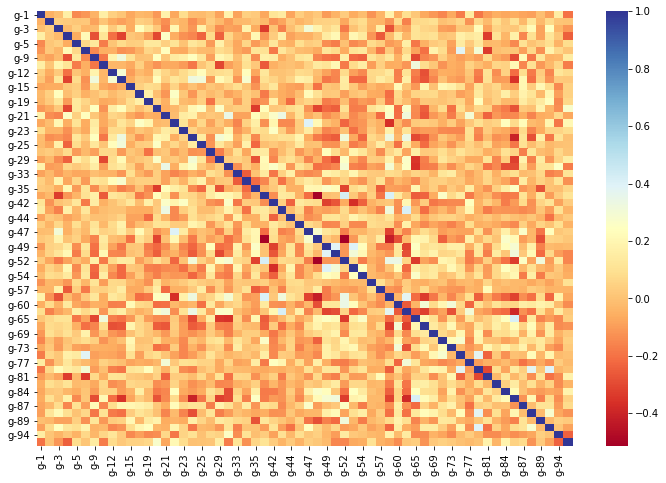

In [ ]:
# diminuição de dimensionalidade mantendo a interpretabilidade
plt.figure(figsize=(12,8))

cor_g = cor.loc['g-0':'g-99','g-0':'g-99']
g = cor_g[abs(cor_g)<=0.4].dropna(thresh=80).index
sns.heatmap(cor_g.loc[g,g], cmap='RdYlBu')
len(g)

0.6190023798882294

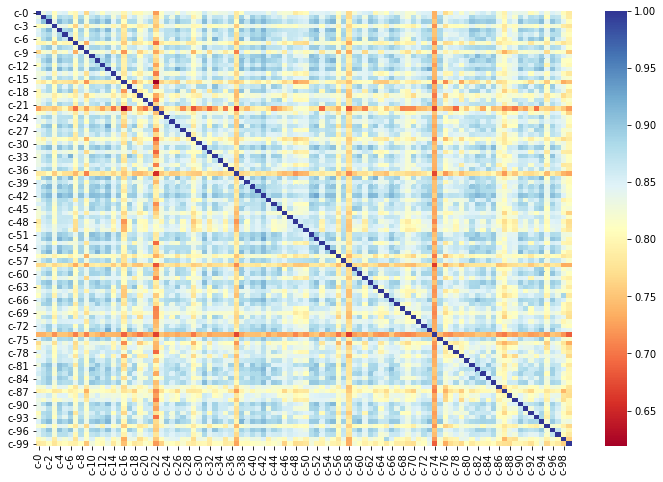

In [ ]:
# diminuição de dimensionalidade mantendo a interpretabilidade
plt.figure(figsize=(12,8))

cor_c = cor.loc['c-0':'c-99','c-0':'c-99']
c = cor_c[abs(cor_c)<=1].dropna(thresh=0).index
sns.heatmap(cor_c.loc[c,c], cmap='RdYlBu')
len(c)

cor_c.min().min()

0.5281961370020212

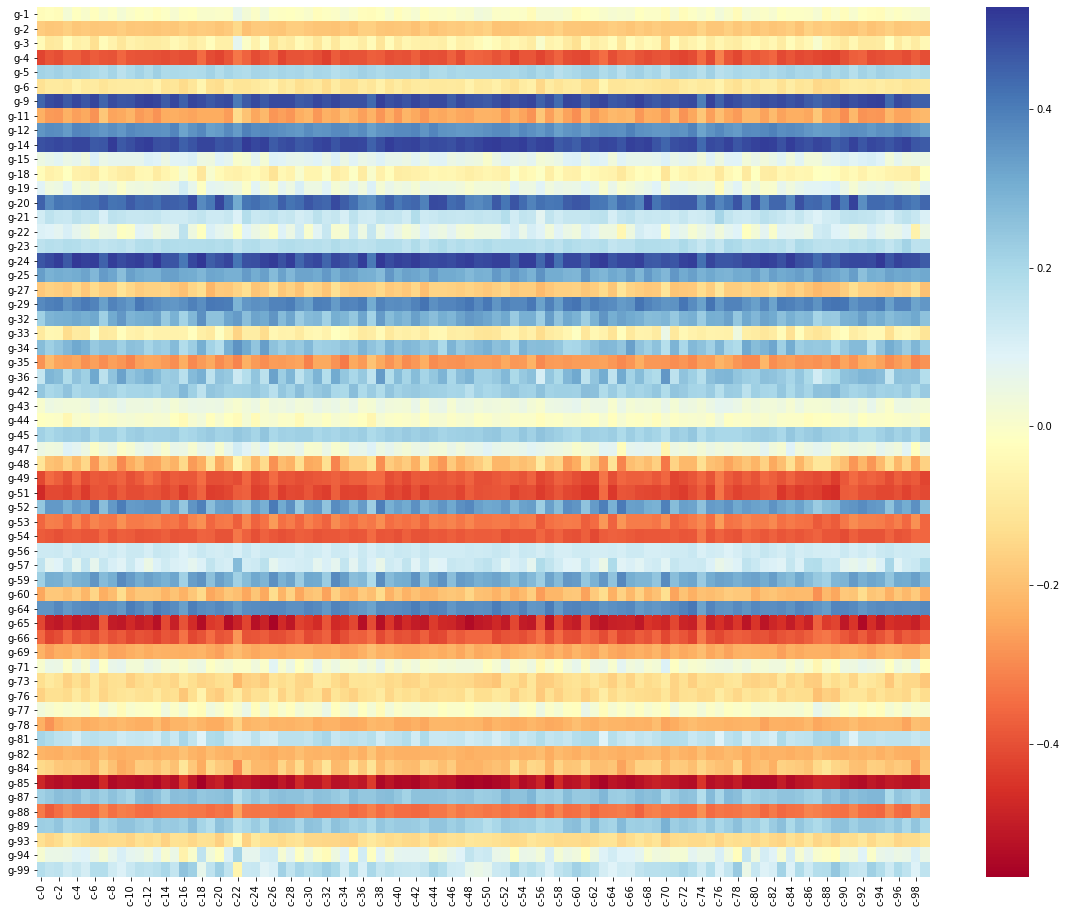

In [ ]:
plt.figure(figsize=(20,16))
sns.heatmap(cor.loc[g,'c-0':'c-99'], cmap='RdYlBu')

cor.loc[g,'c-0':'c-99'].max().max()

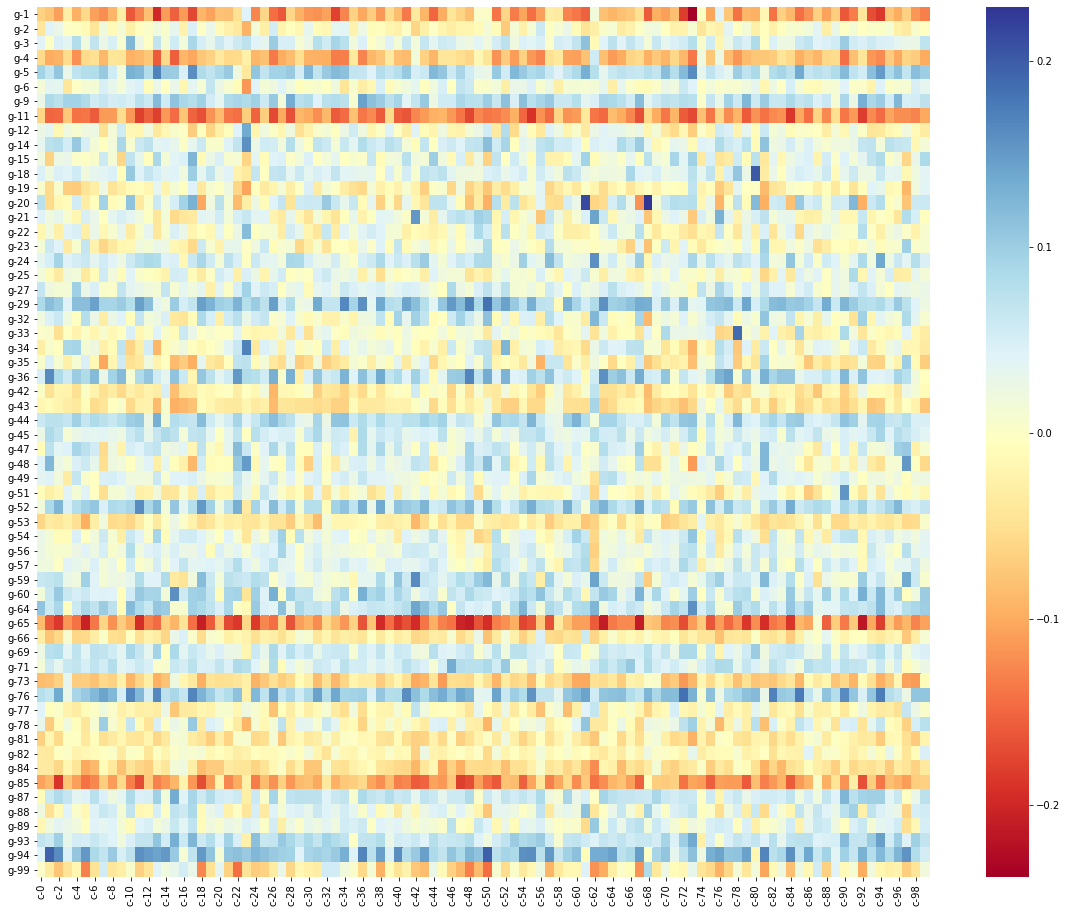

In [ ]:
plt.figure(figsize=(20,16))
sns.heatmap(exp2.query("tratamento == 'com_controle'").corr().loc[g,'c-0':'c-99'], cmap='RdYlBu')

In [ ]:
tbl = exp2.drop('tempo', axis=1).groupby('tratamento').agg(['mean', 'std']).reset_index().melt(id_vars='tratamento', var_name=['grupo', 'agg'])
tbl

,tratamento,grupo,agg,value
0,com_controle,g-0,mean,-0.096364
1,com_droga,g-0,mean,0.277675
2,com_controle,g-0,std,0.833248
3,com_droga,g-0,std,1.427121
4,com_controle,g-1,mean,-0.281979
...,...,...,...,...
3483,com_droga,c-98,std,1.888704
3484,com_controle,c-99,mean,0.263716
3485,com_droga,c-99,mean,-0.349560
3486,com_controle,c-99,std,0.698150


In [ ]:
pivot = tbl.pivot_table(values='value', index='grupo', columns=['tratamento', 'agg'])
pivot

tratamento com_controle           com_droga          
agg                mean       std      mean       std
grupo                                                
c-0            0.127822  0.674085 -0.396219  1.809005
c-1            0.194264  0.797739 -0.510589  2.066069
c-10           0.241917  0.687044 -0.547917  2.131990
c-11           0.246343  0.805428 -0.534603  2.120370
c-12           0.089988  0.760583 -0.558939  2.210668
...                 ...       ...       ...       ...
g-95          -0.235452  0.834245  0.227241  1.344087
g-96          -0.038555  0.927339 -0.451876  1.660433
g-97           0.372568  0.762342  0.206575  1.284759
g-98           0.174032  0.742450 -0.296023  1.531671
g-99           0.037182  0.829670 -0.032029  0.926236

[872 rows x 4 columns]

In [ ]:
dados_test = exp2.drop(['id'], axis=1).melt(id_vars=['tratamento', 'droga', 'dose', 'tempo'], var_name='grupo', )
dados_test

,tratamento,droga,dose,tempo,grupo,value
0,com_droga,b68db1d53,D1,24,g-0,1.0620
1,com_droga,df89a8e5a,D1,72,g-0,0.0743
2,com_droga,18bb41b2c,D1,48,g-0,0.6280
3,com_droga,8c7f86626,D1,48,g-0,-0.5138
4,com_droga,7cbed3131,D2,72,g-0,-0.3254
...,...,...,...,...,...,...
20765803,com_droga,df1d0a5a1,D2,24,c-99,0.4680
20765804,com_droga,ecf3b6b74,D2,24,c-99,0.3689
20765805,com_controle,cacb2b860,D2,48,c-99,0.3808
20765806,com_droga,8b87a7a83,D1,24,c-99,0.0740


In [ ]:
from scipy.stats import ttest_ind


significante = dados_test.query('tratamento == "com_droga"').drop(['tratamento', 'value'], axis=1)




In [ ]:
# from scipy.stats import ttest_ind, anderson_ksamp

# for linha in significante.iterrows():
  
#   dg = linha[1].droga
#   ds = linha[1].dose
#   tp = linha[1].tempo

#   ctrl = dados_test.query('tratamento == "com_controle" & dose == @ds & tempo == @tp').value
#   tst = dados_test.query('droga == @dg & dose == @ds & tempo == @tp').value

  

#   st, cv, cp = anderson_ksamp([np.array(ctrl), np.array(tst)])

#   significante.query('droga == @dg & dose == @ds & tempo == @tp')['valor_p'] = cp
  
#   print(cp)


In [ ]:
'jklas_mkasd_mk'.split(sep='_')[-1]

'mk'

In [ ]:
res2 = res.copy()
res2.columns = [col.split(sep='_')[-1] for col in res2.columns]

In [ ]:
pd.Series([col.split(sep='_')[-1] for col in res2.columns]).value_counts()

inhibitor            112
antagonist            32
agonist               28
activator              5
agent                  3
blocker                2
antiprotozoal          1
analgesic              1
antiviral              1
local                  1
antibiotic             1
antiarrhythmic         1
donor                  1
immunosuppressant      1
antifungal             1
anti-inflammatory      1
sensitizer             1
steroid                1
secretagogue           1
medium                 1
antihistamine          1
diuretic               1
antimalarial           1
b                      1
id                     1
antioxidant            1
scavenger              1
anticonvulsant         1
laxative               1
antifolate             1
stimulant              1
dtype: int64

In [ ]:
pd.Series([col for col in res.columns if col.split(sep='_')[-1]=='antagonist' ]).value_counts()

mineralocorticoid_receptor_antagonist              1
tachykinin_antagonist                              1
dopamine_receptor_antagonist                       1
progesterone_receptor_antagonist                   1
cholinergic_receptor_antagonist                    1
potassium_channel_antagonist                       1
prostanoid_receptor_antagonist                     1
adenosine_receptor_antagonist                      1
tlr_antagonist                                     1
angiotensin_receptor_antagonist                    1
opioid_receptor_antagonist                         1
retinoid_receptor_antagonist                       1
gaba_receptor_antagonist                           1
estrogen_receptor_antagonist                       1
atp-sensitive_potassium_channel_antagonist         1
smoothened_receptor_antagonist                     1
cc_chemokine_receptor_antagonist                   1
serotonin_receptor_antagonist                      1
histamine_receptor_antagonist                 

In [ ]:
pivot = res2.melt(id_vars = 'id', var_name='ação').pivot_table(index='id', columns='ação', aggfunc='sum', margins=True)
pivot

value                ...                         
ação         activator agent agonist  ... steroid stimulant    All
id                                    ...                         
id_000644bb2         0     0       0  ...       0         0      1
id_000779bfc         0     0       0  ...       0         0      0
id_000a6266a         0     0       0  ...       0         0      3
id_0015fd391         0     0       0  ...       0         0      0
id_001626bd3         0     0       0  ...       0         0      1
...                ...   ...     ...  ...     ...       ...    ...
id_fffb70c0c         0     0       1  ...       0         0      1
id_fffc1c3f4         0     0       0  ...       0         0      0
id_fffcb9e7c         0     0       0  ...       0         0      1
id_ffffdd77b         0     0       0  ...       0         0      0
All                115   150    2330  ...       6        49  16844

[23815 rows x 31 columns]

In [ ]:
pivot.iloc[:,-1].value_counts()

1        12532
0         9367
2         1538
3          303
4           55
5           13
7            6
16844        1
Name: (value, All), dtype: int64

In [ ]:
filtro_col = [col for col in res.columns if col.split(sep='_')[-1]=='inhibitor' ]
filtro_col

res.loc[:,filtro_col].sum().sort_values()

erbb2_inhibitor                            1
atm_kinase_inhibitor                       6
elastase_inhibitor                         6
protein_phosphatase_inhibitor              6
ubiquitin_specific_protease_inhibitor      6
                                        ... 
cdk_inhibitor                            340
dna_inhibitor                            402
cyclooxygenase_inhibitor                 435
proteasome_inhibitor                     726
nfkb_inhibitor                           832
Length: 112, dtype: int64

In [ ]:
exp2.tratamento.value_counts()

com_droga       21948
com_controle     1866
Name: tratamento, dtype: int64

In [ ]:
(726)/(1866+726)

0.2800925925925926

# Cruzamento

In [ ]:
dados_prot = pd.merge(exp2, res[['id', 'proteasome_inhibitor']], on='id')

In [ ]:
exp2.shape

(23814, 877)

In [ ]:
dados_prot.shape

(23814, 878)

In [ ]:
res.shape

(23814, 207)

In [ ]:
a = dados_prot.query("proteasome_inhibitor == 1").droga.unique()

In [ ]:
b = dados_prot.query("tratamento == 'com_controle'").droga.unique()

In [ ]:
dados_prot.query("droga == 'cacb2b860'").tratamento.unique()

array(['com_controle'], dtype=object)

In [ ]:
c = dados_prot['droga'].value_counts()[2:5].index

In [ ]:
k = np.concatenate((a,b))
c = dados_prot.query("droga not in @k").sample(700, replace=True).droga

In [ ]:
d= np.concatenate((a,b,c))

In [ ]:
dados_fim = dados_prot.query("droga in @d")

In [ ]:
cor = dados_fim.loc[:,'g-0':'c-99'].corr()
cor

,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,g-26,g-27,g-28,g-29,g-30,g-31,g-32,g-33,g-34,g-35,g-36,g-37,g-38,g-39,...,c-60,c-61,c-62,c-63,c-64,c-65,c-66,c-67,c-68,c-69,c-70,c-71,c-72,c-73,c-74,c-75,c-76,c-77,c-78,c-79,c-80,c-81,c-82,c-83,c-84,c-85,c-86,c-87,c-88,c-89,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
g-0,1.000000,0.166881,0.265558,0.060327,0.547686,-0.249592,0.271240,-0.463815,-0.739910,-0.558757,-0.664085,0.329575,-0.341499,0.583296,-0.489417,-0.211136,-0.650591,-0.592319,-0.030993,-0.145244,-0.614856,-0.011615,-0.115205,-0.121860,-0.428461,-0.385151,-0.546791,0.225357,-0.614188,-0.406987,-0.623913,0.669353,-0.114807,-0.164398,-0.154597,0.344284,-0.195476,-0.646481,0.691412,0.586755,...,-0.762962,-0.761373,-0.767420,-0.681220,-0.712022,-0.724397,-0.728779,-0.723571,-0.746293,-0.744271,-0.746983,-0.743212,-0.766800,-0.761271,-0.687933,-0.753257,-0.646890,-0.740875,-0.778746,-0.686032,-0.737931,-0.675666,-0.722031,-0.774502,-0.683288,-0.762591,-0.727222,-0.719146,-0.747422,-0.788081,-0.753524,-0.723932,-0.727912,-0.766639,-0.739693,-0.703262,-0.750606,-0.724739,-0.739197,-0.722056
g-1,0.166881,1.000000,-0.034939,0.002800,0.280473,-0.188587,-0.108008,0.098346,-0.093371,-0.097928,-0.077073,0.222468,0.020525,0.043893,-0.052382,-0.113284,-0.131743,-0.056407,-0.011163,-0.024169,-0.169233,0.213053,-0.075163,0.101585,-0.057450,-0.071351,-0.058229,0.051708,-0.181201,-0.195491,-0.119846,0.012282,0.218583,-0.190290,0.101206,0.075371,-0.114287,-0.047691,-0.013685,0.120972,...,-0.109838,-0.076473,-0.071555,-0.051207,-0.029191,-0.051310,-0.037495,-0.079582,-0.062774,-0.058700,-0.097380,-0.040372,-0.095539,-0.071875,-0.032912,-0.084090,-0.025894,-0.059761,-0.101726,-0.020867,-0.053376,-0.047185,-0.035112,-0.086512,-0.056182,-0.077971,-0.040963,-0.046044,-0.079842,-0.078126,-0.095239,-0.045827,-0.070604,-0.105487,-0.099360,-0.034665,-0.080892,-0.059744,-0.035744,-0.050746
g-2,0.265558,-0.034939,1.000000,0.099894,0.075709,-0.009802,0.017738,-0.234971,-0.211116,-0.177236,-0.204086,0.089692,-0.151750,0.185570,-0.165001,-0.083074,-0.232803,-0.174002,0.070352,0.027965,-0.160062,-0.157506,-0.018562,-0.081442,-0.219805,-0.127202,-0.211466,0.072508,-0.236628,-0.116679,-0.260460,0.278679,-0.139038,-0.062033,-0.024321,0.049627,-0.074316,-0.261544,0.267407,0.229164,...,-0.290812,-0.285283,-0.288390,-0.283844,-0.264820,-0.283758,-0.289357,-0.268987,-0.290971,-0.273242,-0.289523,-0.284785,-0.285430,-0.288749,-0.266761,-0.288121,-0.293022,-0.263827,-0.288157,-0.264272,-0.290785,-0.274401,-0.291891,-0.287179,-0.264720,-0.296091,-0.261067,-0.269285,-0.269412,-0.282346,-0.296721,-0.294426,-0.272154,-0.293250,-0.286261,-0.256189,-0.292251,-0.282411,-0.280797,-0.279480
g-3,0.060327,0.002800,0.099894,1.000000,-0.039726,0.026263,-0.092322,-0.251381,-0.080628,-0.053917,-0.094599,0.297834,0.050352,0.259871,0.107349,-0.069810,-0.006140,-0.044182,0.265696,0.114581,0.034521,-0.241414,0.169725,-0.083516,-0.180854,0.188389,0.078570,-0.008403,-0.046831,-0.260919,-0.073257,0.108255,-0.112684,-0.167325,0.309302,-0.132348,-0.426644,-0.298188,0.095567,0.049064,...,-0.170076,-0.072815,-0.118435,-0.100921,-0.032961,-0.146090,-0.050527,-0.114910,-0.066053,-0.065441,-0.183847,-0.043972,-0.117945,-0.082296,-0.047387,-0.122739,-0.092579,-0.109569,-0.132785,-0.057422,-0.061705,-0.074941,-0.070327,-0.135294,-0.039009,-0.102804,-0.040742,0.000932,-0.074126,-0.098168,-0.136064,-0.083696,-0.120968,-0.159333,-0.121354,0.004399,-0.122143,-0.080604,-0.106937,-0.049266
g-4,0.547686,0.280473,0.075709,-0.039726,1.000000,-0.161600,0.259867,-0.145696,-0.620572,-0.395377,-0.563970,0.206826,-0.317464,0.307480,-0.457240,0.010472,-0.431891,-0.540409,-0.025121,-0.108231,-0.462757,0.282940,-0.135967,-0.113932,-0.251442,-0.378053,-0.449160,0.149384,-0.494701,-0.353115,-0.526046,0.462638,0.097046,-0.070269,-0.121564,0.287354,-0.136565,-0.377733,0.414682,0.420381,...,-0.530960,-0.551907,-0.506775,-0.457259,-0.5

49

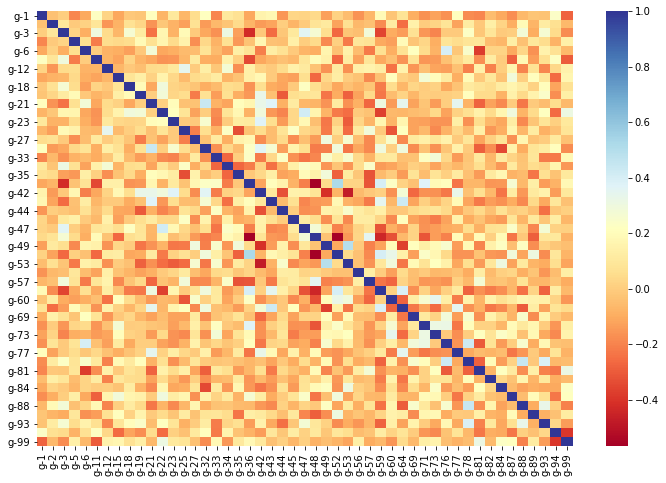

In [ ]:
# diminuição de dimensionalidade mantendo a interpretabilidade
plt.figure(figsize=(12,8))

cor_g = cor.loc['g-0':'g-99','g-0':'g-99']
g = cor_g[abs(cor_g)<=0.4].dropna(thresh=80).index
sns.heatmap(cor_g.loc[g,g], cmap='RdYlBu')
len(g)

0.7656661020670978

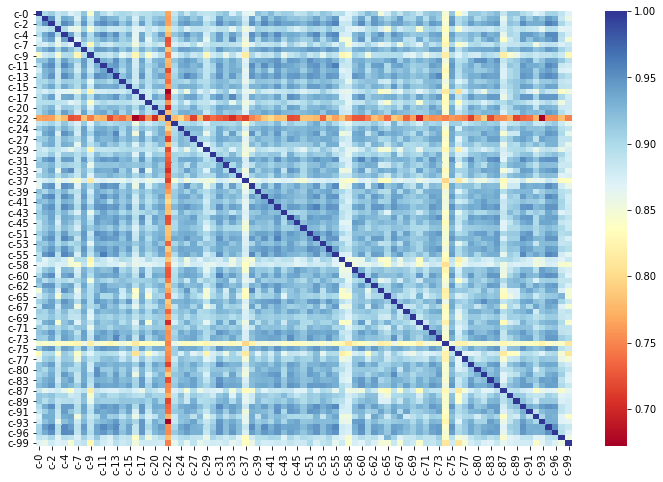

In [ ]:
# diminuição de dimensionalidade mantendo a interpretabilidade
plt.figure(figsize=(12,8))

cor_c = cor.loc['c-0':'c-99','c-0':'c-99']
c = cor_c[abs(cor_c)<=0.8].dropna(thresh=1).index
sns.heatmap(cor_c.loc[c,c], cmap='RdYlBu')
len(c)

cor_c.mean().min()

0.5171384927402984

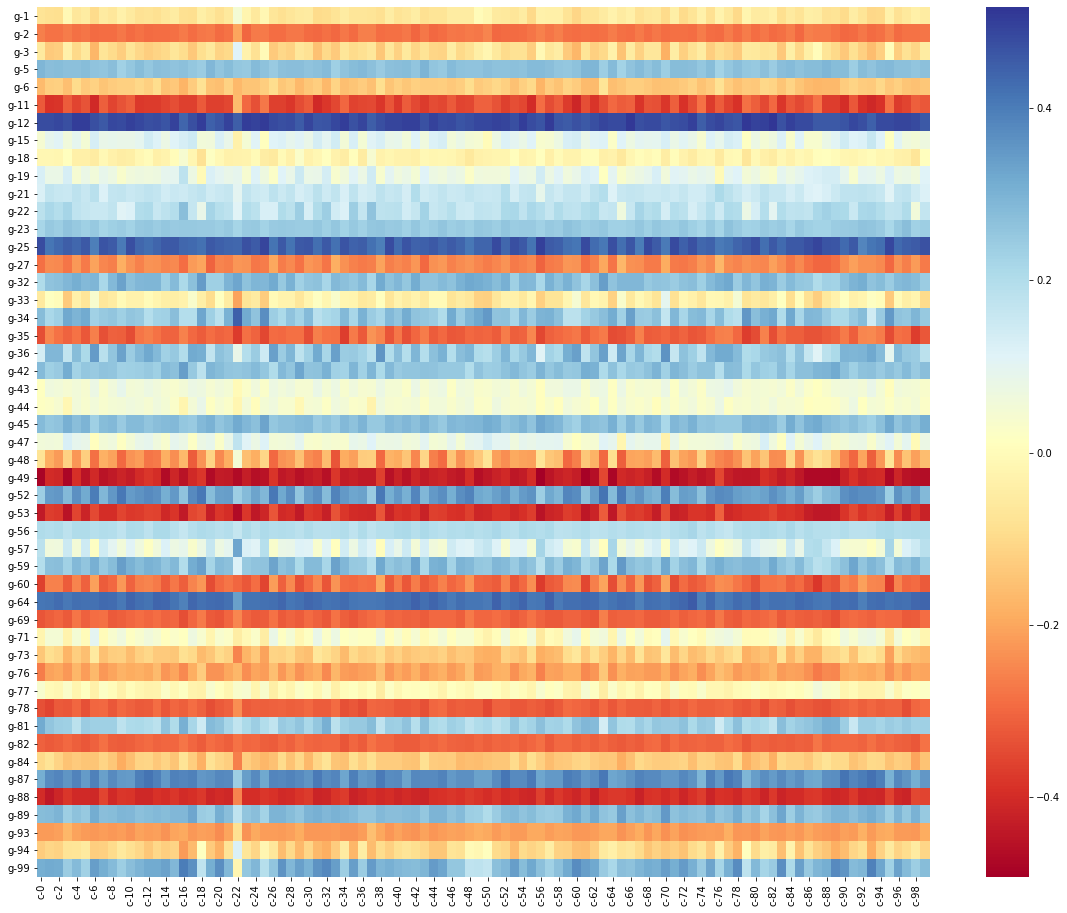

In [ ]:
plt.figure(figsize=(20,16))
sns.heatmap(cor.loc[g,'c-0':'c-99'], cmap='RdYlBu')

cor.loc[g,'c-0':'c-99'].max().max()

0.2023508502805531

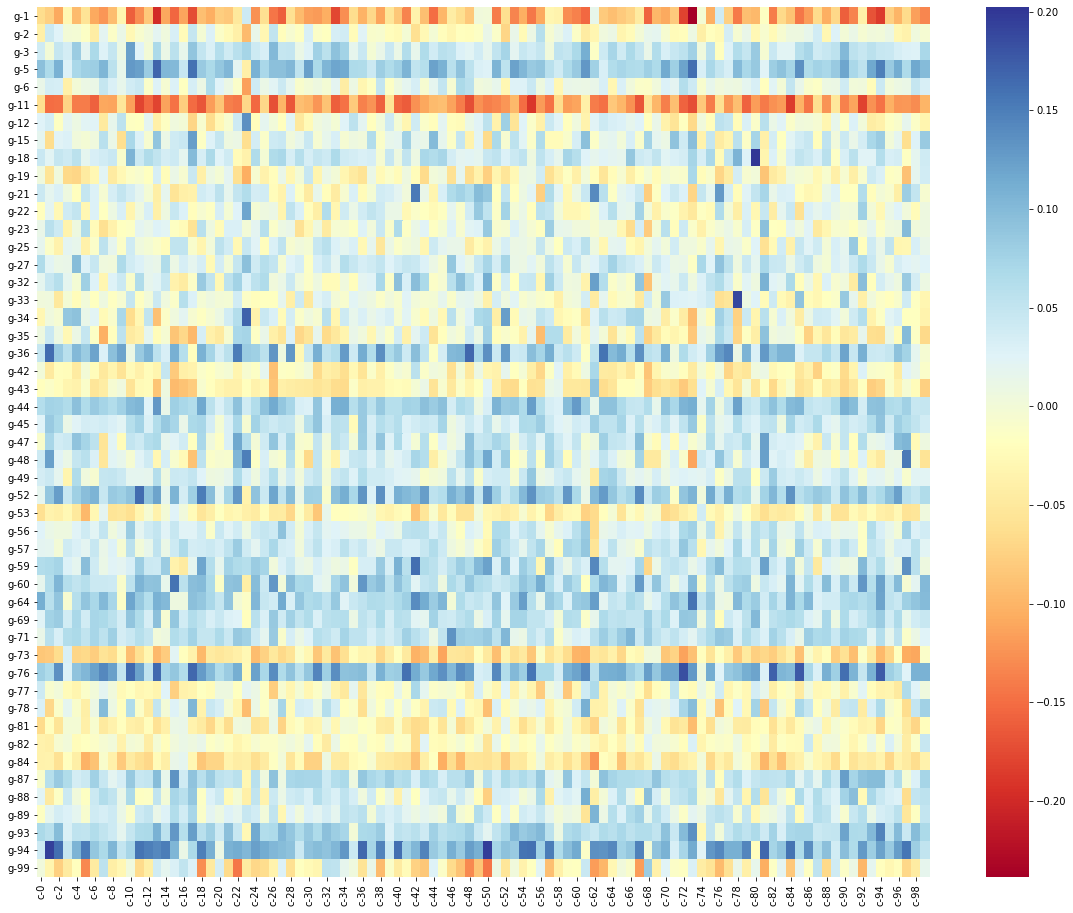

In [ ]:
plt.figure(figsize=(20,16))
sns.heatmap(dados_fim.query("tratamento == 'com_controle'").corr().loc[g,'c-0':'c-99'], cmap='RdYlBu')
dados_fim.query("tratamento == 'com_controle'").corr().loc[g,'c-0':'c-99'].max().max()

In [ ]:
dados_fim.iloc[:,-1].value_counts()

0    7045
1     726
Name: proteasome_inhibitor, dtype: int64

In [ ]:
dados_fim.droga.value_counts()

cacb2b860    1866
87d714366     718
9f80f3f77     246
8b87a7a83     203
5628cb3ee     202
             ... 
7179d2160       1
379302187       1
161572520       1
5def38f5f       1
aeb28b1ee       1
Name: droga, Length: 611, dtype: int64

In [ ]:
aux.droga.value_counts()

d1b47f29d    11
d50f18348     8
8b87a7a83     7
9f80f3f77     7
5628cb3ee     7
             ..
45bc7100a     1
d914db0f1     1
3f4bbc519     1
7d2c7255a     1
1bcab17e9     1
Name: droga, Length: 601, dtype: int64

In [ ]:
c

Index(['c-0', 'c-1', 'c-2', 'c-3', 'c-4', 'c-6', 'c-7', 'c-8', 'c-9', 'c-10',
       'c-11', 'c-12', 'c-13', 'c-14', 'c-15', 'c-16', 'c-17', 'c-19', 'c-20',
       'c-21', 'c-22', 'c-23', 'c-24', 'c-26', 'c-27', 'c-28', 'c-29', 'c-30',
       'c-31', 'c-32', 'c-33', 'c-35', 'c-37', 'c-38', 'c-39', 'c-40', 'c-41',
       'c-42', 'c-43', 'c-44', 'c-45', 'c-47', 'c-51', 'c-52', 'c-53', 'c-54',
       'c-55', 'c-56', 'c-58', 'c-59', 'c-60', 'c-61', 'c-62', 'c-63', 'c-65',
       'c-66', 'c-67', 'c-68', 'c-69', 'c-70', 'c-71', 'c-72', 'c-73', 'c-74',
       'c-75', 'c-76', 'c-77', 'c-78', 'c-80', 'c-82', 'c-83', 'c-85', 'c-87',
       'c-88', 'c-89', 'c-90', 'c-91', 'c-92', 'c-93', 'c-94', 'c-96', 'c-98',
       'c-99'],
      dtype='object')

In [ ]:
dados_prot.query("droga not in @k").sample(700, replace=True)

,id,tratamento,tempo,dose,droga,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,g-26,g-27,g-28,g-29,g-30,g-31,g-32,g-33,g-34,...,c-61,c-62,c-63,c-64,c-65,c-66,c-67,c-68,c-69,c-70,c-71,c-72,c-73,c-74,c-75,c-76,c-77,c-78,c-79,c-80,c-81,c-82,c-83,c-84,c-85,c-86,c-87,c-88,c-89,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99,proteasome_inhibitor
23340,id_fada0e9c8,com_droga,48,D2,3e163d571,-0.1242,-0.8598,0.5126,0.2510,0.2905,1.9280,-0.6547,0.5170,-0.5385,-0.4257,-0.0237,-0.4570,-0.1611,0.2457,1.1330,0.2243,1.8420,-0.5198,0.8448,0.5527,0.4143,-0.1719,0.8765,0.4053,0.9304,-0.2059,-0.4754,0.6783,-0.2070,0.8226,0.3189,0.3347,0.1178,-0.7357,-0.5067,...,0.8316,0.8884,0.2522,0.9552,0.5189,0.2816,0.8790,0.8734,0.2802,0.8223,-0.0203,0.8249,1.3060,-0.7574,0.5916,0.6502,-0.0664,0.9095,0.8767,0.3588,-0.1390,0.5472,0.3016,0.2165,-0.0394,0.0198,1.0300,0.1634,0.8081,0.5961,-0.2421,0.0615,1.1700,0.6966,1.0300,0.5714,-0.9653,1.1860,0.2603,0
7423,id_4fa2924ef,com_droga,48,D1,9f80f3f77,-0.9595,-0.4724,-0.0740,0.5450,-0.5570,1.9200,0.7780,-1.3270,0.4165,1.0580,0.9505,-0.4161,0.6008,0.5337,0.1643,-0.1433,0.8023,0.9186,-0.5993,-1.1750,1.3580,0.1203,-0.1205,0.0000,-0.3438,0.5076,0.3356,0.1908,0.5552,0.3404,0.3575,0.7205,-0.4162,-1.0230,0.0548,...,-0.4591,-0.0713,-0.8213,-0.0414,0.2003,-0.1267,0.1919,-0.1001,-1.4790,-0.2659,0.0737,0.2052,0.0272,0.4550,0.2112,0.3344,-0.4166,-0.0064,0.3859,-0.5513,-0.3766,-0.4691,-0.6114,-0.2542,-0.6207,0.5196,-1.0230,-0.3123,0.2588,-0.0549,-0.8968,-0.4487,0.6543,0.0306,-0.1465,0.2320,-0.4704,0.8244,-0.3065,0
13496,id_9184486ae,com_droga,24,D2,4801f27e4,-0.4560,-0.1905,0.2967,0.1649,0.1025,0.2979,-0.1358,0.1197,-0.0922,1.0800,0.7081,0.6705,0.3573,0.0180,-0.0489,-0.2070,0.1488,0.3722,0.3268,-0.4647,-0.0699,0.2506,0.4000,0.0000,0.3974,-1.0050,0.5042,0.1176,0.0589,0.1077,0.5284,-0.5232,0.2629,-0.6674,0.0737,...,-0.3479,0.5227,0.6066,0.9178,0.0401,-0.2434,0.6536,0.1926,0.9560,-0.2598,0.9370,-0.2173,-0.1709,-0.8624,-1.2220,0.6378,0.7853,0.3981,0.1698,0.0133,0.0789,1.5580,0.7794,-0.5324,0.6748,0.7678,-0.0869,1.2050,-0.1146,1.3270,0.0818,-0.1700,0.7963,-0.3373,0.2557,0.1071,-0.6448,0.6253,0.6438,0
18007,id_c1541ffab,com_droga,72,D2,b79ec161d,-0.8554,0.0253,0.2338,0.9416,0.1251,-0.0687,-0.2378,0.2330,0.3240,0.5312,-0.2713,0.2887,-0.7257,-1.3240,0.6998,0.5315,0.9143,-0.3437,-0.0870,0.1757,0.2070,-0.3939,0.1339,-0.3096,-0.1961,-0.2121,0.0556,-0.0236,-0.4126,-0.2416,-0.3715,-0.4712,-0.4665,-0.2576,1.3560,...,-0.2802,0.6188,-1.3340,0.3111,1.1230,0.3515,-0.1019,0.4551,0.0693,0.2367,-0.5418,0.5844,0.6017,-0.1996,0.8899,-1.0180,-0.3069,-0.7846,-0.1559,0.5739,1.3050,0.0414,0.1762,-0.3590,0.7104,-0.3796,-1.0340,0.4920,-0.2993,-1.1250,-0.0328,1.1530,-0.0388,0.3488,0.3875,0.2021,-0.3327,0.0967,-0.4786,0
22148,id_ed8b17cf0,com_droga,72,D2,94ce06893,-0.5378,-0.7784,0.1035,-0.0629,-0.3957,-0.5339,0.6524,0.8557,-0.3766,0.3638,0.3222,0.0694,-0.3770,-0.2467,0.4287,0.5247,0.9650,-0.2030,0.1174,0.2300,-0.5131,-0.7365,-0.1875,0.9822,0.0943,-0.1024,-0.0956,0.1441,-0.2975,0.0368,0.3017,-0.0760,0.0848,-0.5544,-1.0350,...,-0.7916,-1.3970,-0.4088,-0.0884,-0.1869,-0.6593,-0.7051,-1.3980,-0.0488,-0.1948,-1.0610,0.0827,0.6722,-0.2188,0.5580,-1.9520,-2.9220,-0.7277,-0.3721,-0.5918,0.4197,-0.8534,-0.0360,-0.0692,0.2330,0.1795,-0.6210,-0.1660,-0.0356,-0.5511,0.1703,-0.4340,-0.5906,0.0211,-0.1785,0.2194,0.3270,-0.7861,0.1178,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15556,id_a778b7feb,com_droga,72,D2,931ae30d5,-0.0774,0.8963,-1.0690,-0.9554,0.4029,-0.3422,-0.0983,1.1420,-0.0762,1.4980,0.3928,-0.1775,0.1051,-1.2010,-0.1696,-0.2591,1.1950,-0.4983,0.4593,0.1126,-0.4038,-0.2478,0.2324,0.5639,0.1082,-0.9068,-0.3

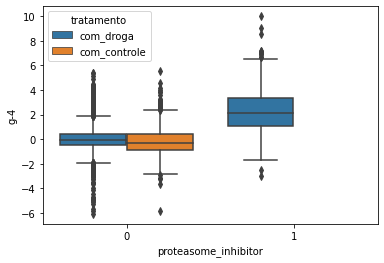

In [ ]:
sns.boxplot(data=dados_fim, x='proteasome_inhibitor', y='g-4', hue='tratamento')

In [ ]:
def plotar_quadro(grafico_sns, x, y, hue=None, hue_order=None, cols=None, rows=None):

  if rows:
    linhas = np.sort(dados_fim[rows].unique())
    nrows = len(linhas)
  else:
    linhas = None
    nrows = 1

  if cols:
    colunas = np.sort(dados_fim[cols].unique())
    ncols = len(colunas)
  else:
    colunas = None
    ncols = 1



  plt.figure(figsize=(20,20))
  fig, axs = plt.subplots(nrows, ncols, sharex = 'all', figsize=(20,15))


  for i in range(nrows):
    for j in range(ncols):
      
      if linhas:
        lin = linhas[i]
      else:
        lin = None
      

      col = colunas [j]
      axs[i][j].set_title(rows + ': '+ str(lin) + ', ' + cols + ': ' + str(col), fontdict={'fontsize': 14})
      sns.boxplot(data=dados_fim[(dados_fim[rows]==lin) & (dados_fim[cols]==col)], x=x, y=y, hue=hue, hue_order=hue_order, ax = axs[i][j])



TypeError: ignored

<Figure size 1440x1440 with 0 Axes>

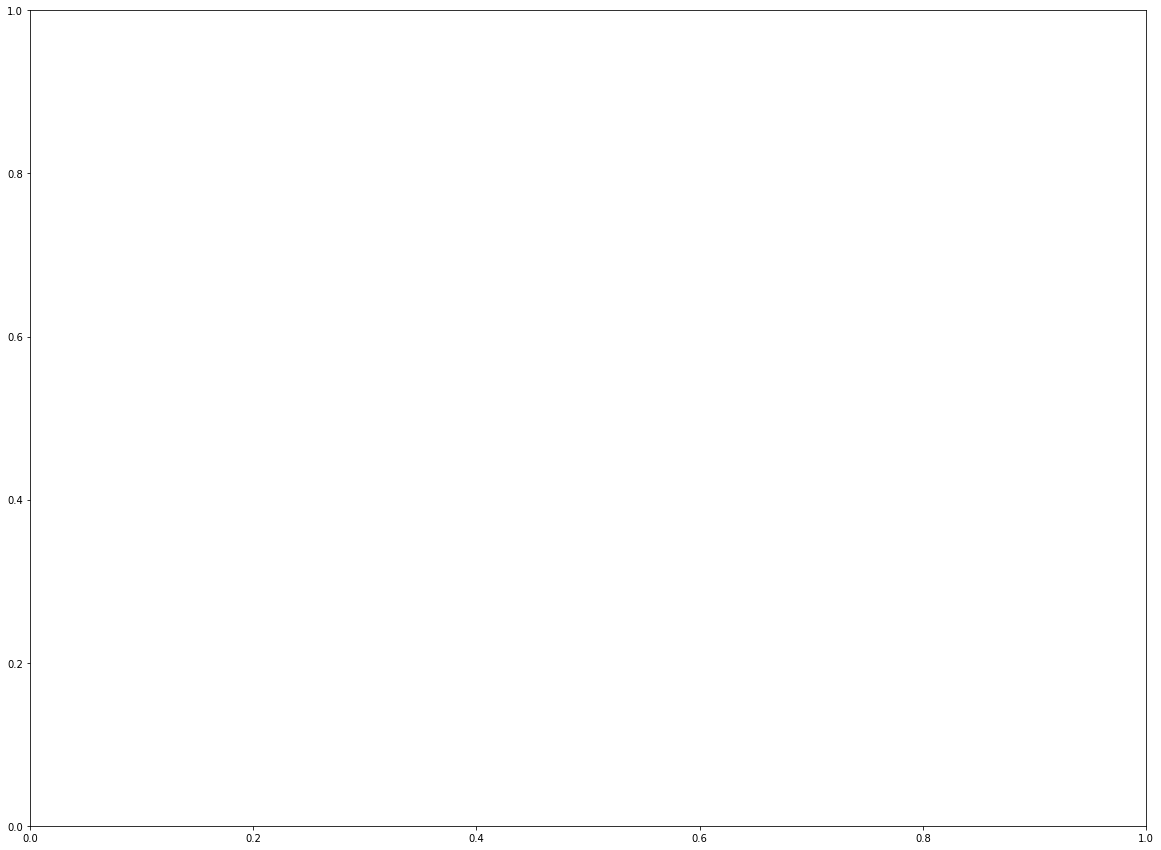

In [ ]:
plotar_quadro(grafico_sns=sns.boxplot, x='proteasome_inhibitor', y='g-99', 
              #hue='tratamento', hue_order=['com_controle', 'com_droga'], 
              #cols='tempo', rows='dose'
              )

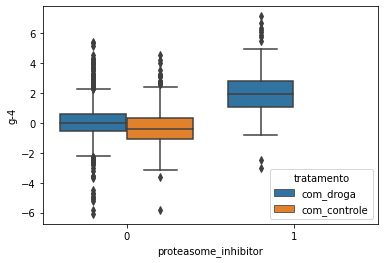

In [ ]:
sns.boxplot(data=dados_fim.query("dose == 'D1'"), x='proteasome_inhibitor', y='g-4', hue='tratamento')

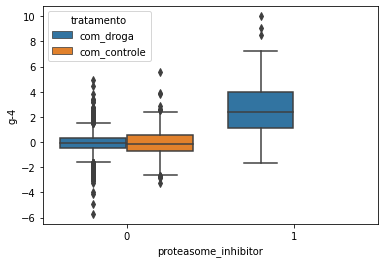

In [ ]:
sns.boxplot(data=dados_fim.query("dose == 'D2'"), x='proteasome_inhibitor', y='g-4', hue='tratamento')

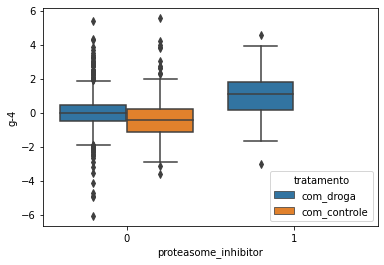

In [ ]:
sns.boxplot(data=dados_fim.query("tempo == 24"), x='proteasome_inhibitor', y='g-4', hue='tratamento')

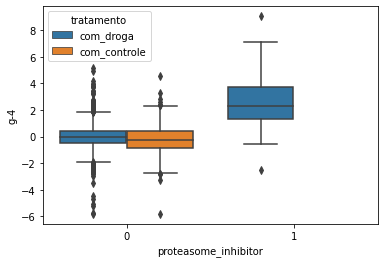

In [ ]:
sns.boxplot(data=dados_fim.query("tempo == 48"), x='proteasome_inhibitor', y='g-4', hue='tratamento')

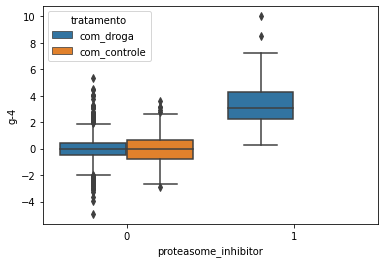

In [ ]:
sns.boxplot(data=dados_fim.query("tempo == 72"), x='proteasome_inhibitor', y='g-4', hue='tratamento')